# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

!pip install statsmodels==0.13.2 --quiet

!pip install tvdatafeed --quiet
from tvDatafeed import TvDatafeed ,Interval

!pip install pmdarima --quiet
import pmdarima as pm

%matplotlib inline

     |████████████████████████████████| 9.8 MB 4.2 MB/s 
     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 1.8 MB 4.8 MB/s 


In [2]:
tv = TvDatafeed()
data = tv.get_hist(symbol='PNB',exchange='NSE',n_bars=5000)
data['date'] = data.index.astype(str)
new = data['date'].str.split(' ',expand=True)
data['date'] = new[0]
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data

,symbol,open,high,low,close,volume
date,,,,,,
2002-07-18,NSE:PNB,9.410000,9.500000,9.280000,9.380000,271340.0
2002-07-19,NSE:PNB,8.600000,9.400000,8.600000,9.300000,317560.0
2002-07-22,NSE:PNB,9.200000,9.200000,8.920000,8.960000,508510.0
2002-07-23,NSE:PNB,9.240000,9.240000,8.820000,9.120000,321750.0
2002-07-24,NSE:PNB,9.020000,9.200000,9.000000,9.140000,614330.0
...,...,...,...,...,...,...
2022-10-27,NSE:PNB,43.500000,43.599998,42.549999,43.000000,96348564.0
2022-10-28,NSE:PNB,43.299999,44.799999,42.700001,43.099998,118353597.0
2022-10-31,NSE:PNB,43.599998,43.750000,41.750000,42.650002,82205500.0


In [3]:
timeseriesdf = data[['close']]
timeseriesdf

,close
date,
2002-07-18,9.380000
2002-07-19,9.300000
2002-07-22,8.960000
2002-07-23,9.120000
2002-07-24,9.140000
...,...
2022-10-27,43.000000
2022-10-28,43.099998
2022-10-31,42.650002


In [4]:
timeseriessq = data['close']
timeseriessq

date
2002-07-18     9.380000
2002-07-19     9.300000
2002-07-22     8.960000
2002-07-23     9.120000
2002-07-24     9.140000
                ...    
2022-10-27    43.000000
2022-10-28    43.099998
2022-10-31    42.650002
2022-11-01    40.099998
2022-11-02    39.400000
Name: close, Length: 5000, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2002-07-18 to 2022-11-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  5000 non-null   object 
 1   open    5000 non-null   float64
 2   high    5000 non-null   float64
 3   low     5000 non-null   float64
 4   close   5000 non-null   float64
 5   volume  5000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 273.4+ KB


In [6]:
data.index

DatetimeIndex(['2002-07-18', '2002-07-19', '2002-07-22', '2002-07-23',
               '2002-07-24', '2002-07-25', '2002-07-26', '2002-07-29',
               '2002-07-30', '2002-07-31',
               ...
               '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-24',
               '2022-10-25', '2022-10-27', '2022-10-28', '2022-10-31',
               '2022-11-01', '2022-11-02'],
              dtype='datetime64[ns]', name='date', length=5000, freq=None)

# Visualisation

In [7]:
plt.figure(figsize=(20,8))
fig = cf.Figure(data=[cf.Candlestick(x=data.index, 
                open=data['open'],
                high = data['high'],
                low = data['low'],
                close = data['close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<Figure size 1440x576 with 0 Axes>

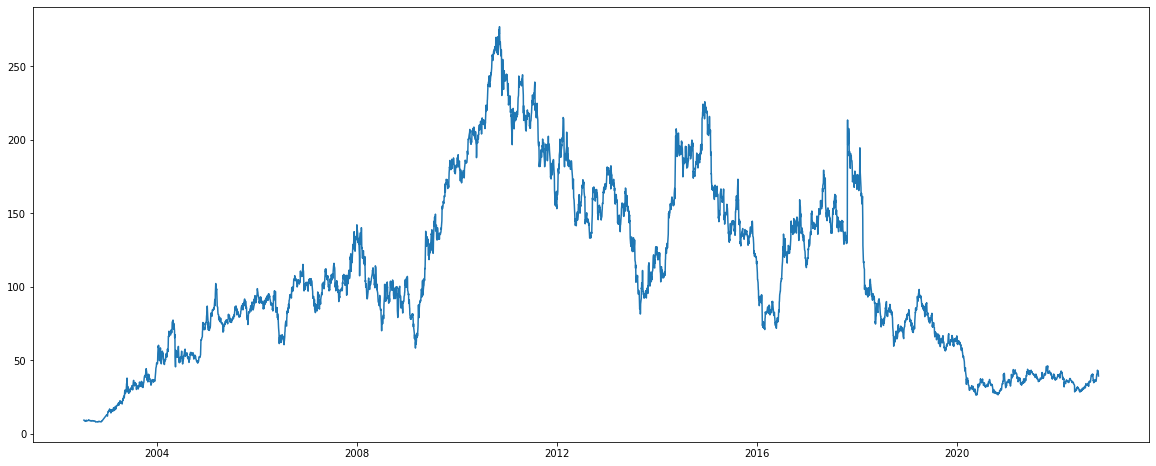

In [8]:
plt.figure(figsize = (20,8))
plt.plot(data.close)

#### Histogram and Density Plots

#### Box and Whisker Plots by Interval

In [9]:
# create a boxplot of yearly data
databoxplot = data
databoxplot['date'] = databoxplot.index.astype(str)
new = databoxplot['date'].str.split(' ',expand=True)
databoxplot['date'] = new[0]
databoxplot = databoxplot[['date','close']]
databoxplot['year'] = databoxplot['date'].str[:4].astype(int)
databoxplot['date1'] = databoxplot['date'].str[5:]
databoxplot

,date,close,year,date1
date,,,,
2002-07-18,2002-07-18,9.380000,2002,07-18
2002-07-19,2002-07-19,9.300000,2002,07-19
2002-07-22,2002-07-22,8.960000,2002,07-22
2002-07-23,2002-07-23,9.120000,2002,07-23
2002-07-24,2002-07-24,9.140000,2002,07-24
...,...,...,...,...
2022-10-27,2022-10-27,43.000000,2022,10-27
2022-10-28,2022-10-28,43.099998,2022,10-28
2022-10-31,2022-10-31,42.650002,2022,10-31


In [10]:
databoxplot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2002-07-18 to 2022-11-02
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5000 non-null   object 
 1   close   5000 non-null   float64
 2   year    5000 non-null   int64  
 3   date1   5000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 195.3+ KB


In [11]:
years = pd.pivot_table(databoxplot,index = 'date1', values = 'close',columns='year', aggfunc = sum)

years

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
date1,,,,,,,,,,,,,,,,,,,,,
01-01,NaN,13.089999,48.340000,NaN,NaN,NaN,134.259998,106.340002,NaN,NaN,...,178.490002,127.369996,219.64999,117.60,NaN,169.750000,79.800003,64.699997,34.799999,NaN
01-02,NaN,13.070000,48.040000,NaN,94.400000,102.320002,142.269996,106.430004,NaN,NaN,...,181.100000,121.800000,219.80000,NaN,115.60000,166.399990,77.849998,66.699997,NaN,NaN
01-03,NaN,12.680000,NaN,83.809998,94.679998,103.119996,140.459998,NaN,NaN,244.550000,...,179.359998,123.780004,NaN,NaN,118.05000,166.600010,77.849998,65.050003,NaN,38.000000
01-04,NaN,NaN,NaN,86.979998,96.879998,102.170002,139.909998,NaN,185.100000,244.150000,...,181.619996,NaN,NaN,112.80,115.25000,176.450000,81.300003,NaN,35.549999,38.349998
01-05,NaN,NaN,47.710000,84.670002,98.850000,102.309998,NaN,107.159998,187.959998,241.100000,...,NaN,NaN,217.75000,110.60,117.65000,176.000000,NaN,NaN,35.599998,38.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,NaN,NaN,75.929998,91.790002,103.150000,132.069996,NaN,NaN,241.540000,161.250000,...,127.400000,NaN,NaN,116.00,174.10001,77.949997,65.349998,NaN,37.250000,NaN
12-28,NaN,NaN,75.890002,91.870002,102.780004,134.490002,NaN,NaN,243.360000,154.869996,...,NaN,NaN,120.45000,113.95,170.80000,78.449997,NaN,32.400002,37.299999,NaN
12-29,NaN,45.960000,78.590002,91.190002,101.400000,NaN,102.450000,182.869996,244.780000,156.180004,...,NaN,219.500000,120.00000,113.15,171.39999,NaN,NaN,33.200001,37.150002,NaN


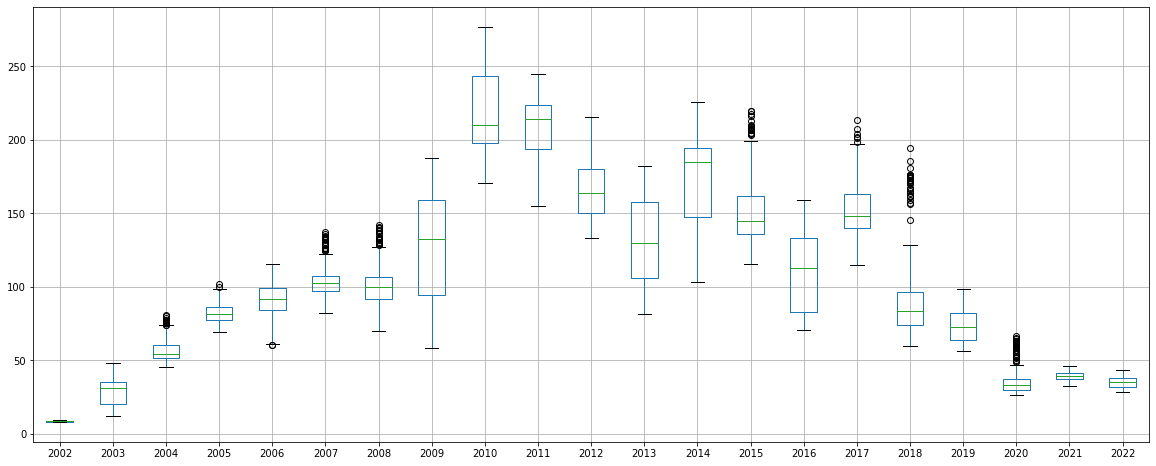

In [12]:
plt.figure(figsize = (20,8))
years.boxplot()

#### Lag plot

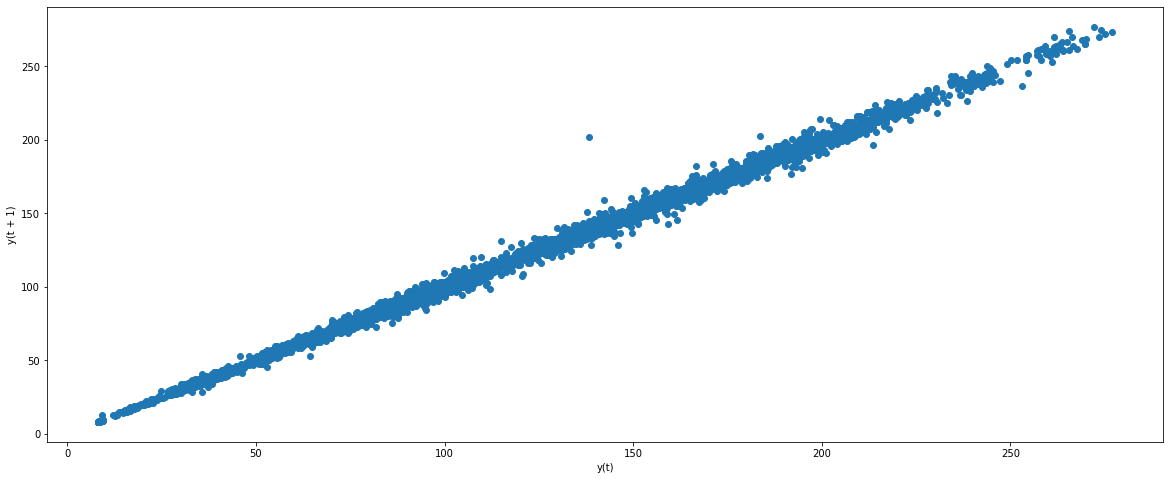

In [13]:
# create a scatter plot
plt.figure(figsize = (20,8))
pd.plotting.lag_plot(timeseriesdf)

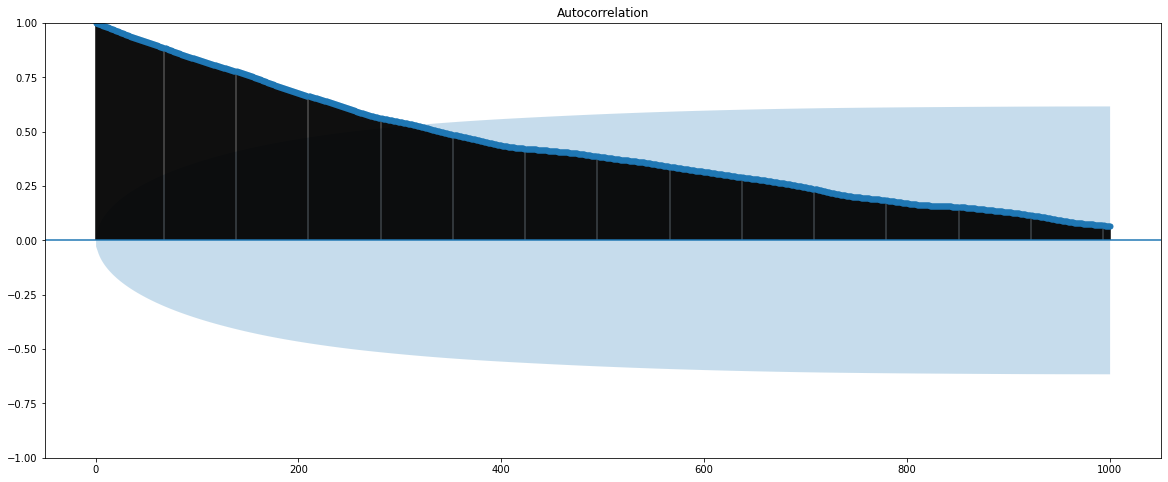

In [14]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(20,8))
plot_acf(timeseriesdf, lags=1000)
plt.show()

# Taking care of outliers

In [15]:
data

,symbol,open,high,low,close,volume,date
date,,,,,,,
2002-07-18,NSE:PNB,9.410000,9.500000,9.280000,9.380000,271340.0,2002-07-18
2002-07-19,NSE:PNB,8.600000,9.400000,8.600000,9.300000,317560.0,2002-07-19
2002-07-22,NSE:PNB,9.200000,9.200000,8.920000,8.960000,508510.0,2002-07-22
2002-07-23,NSE:PNB,9.240000,9.240000,8.820000,9.120000,321750.0,2002-07-23
2002-07-24,NSE:PNB,9.020000,9.200000,9.000000,9.140000,614330.0,2002-07-24
...,...,...,...,...,...,...,...
2022-10-27,NSE:PNB,43.500000,43.599998,42.549999,43.000000,96348564.0,2022-10-27
2022-10-28,NSE:PNB,43.299999,44.799999,42.700001,43.099998,118353597.0,2022-10-28
2022-10-31,NSE:PNB,43.599998,43.750000,41.750000,42.650002,82205500.0,2022-10-31


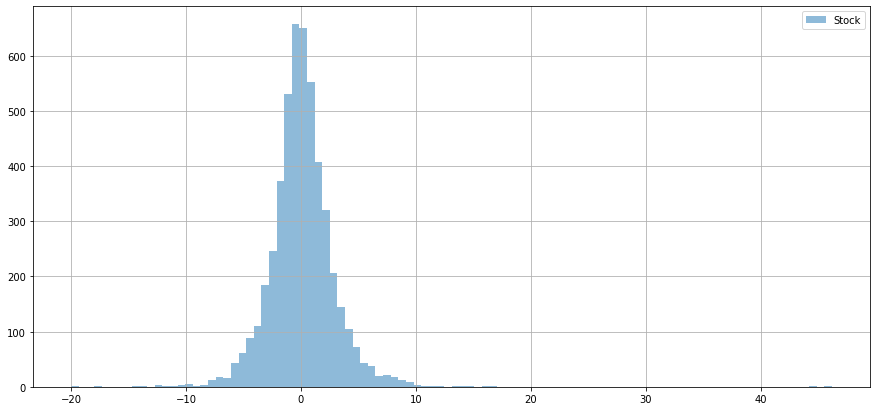

In [16]:
data['returns percentage'] = ((data['close']/data['close'].shift(1)) -1)*100
data['returns percentage'].hist(bins = 100, label = 'Stock', alpha = 0.5, figsize = (15,7))
plt.legend()

In [17]:
data

,symbol,open,high,low,close,volume,date,returns percentage
date,,,,,,,,
2002-07-18,NSE:PNB,9.410000,9.500000,9.280000,9.380000,271340.0,2002-07-18,NaN
2002-07-19,NSE:PNB,8.600000,9.400000,8.600000,9.300000,317560.0,2002-07-19,-0.852883
2002-07-22,NSE:PNB,9.200000,9.200000,8.920000,8.960000,508510.0,2002-07-22,-3.655916
2002-07-23,NSE:PNB,9.240000,9.240000,8.820000,9.120000,321750.0,2002-07-23,1.785712
2002-07-24,NSE:PNB,9.020000,9.200000,9.000000,9.140000,614330.0,2002-07-24,0.219305
...,...,...,...,...,...,...,...,...
2022-10-27,NSE:PNB,43.500000,43.599998,42.549999,43.000000,96348564.0,2022-10-27,-0.692838
2022-10-28,NSE:PNB,43.299999,44.799999,42.700001,43.099998,118353597.0,2022-10-28,0.232553
2022-10-31,NSE:PNB,43.599998,43.750000,41.750000,42.650002,82205500.0,2022-10-31,-1.044074


In [18]:
datac = data.iloc[1:]
x = datac['returns percentage']
x

date
2002-07-19   -0.852883
2002-07-22   -3.655916
2002-07-23    1.785712
2002-07-24    0.219305
2002-07-25   -0.218825
                ...   
2022-10-27   -0.692838
2022-10-28    0.232553
2022-10-31   -1.044074
2022-11-01   -5.978907
2022-11-02   -1.745631
Name: returns percentage, Length: 4999, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f807dfe93d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f807dfe9e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f807dfe0e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f807df6e950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f807df6ee90>],
 'means': []}

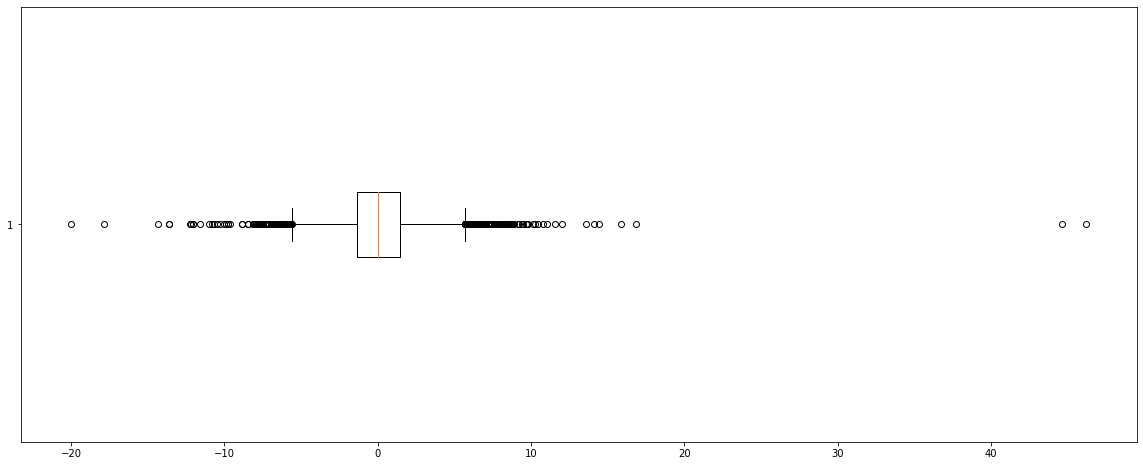

In [19]:
plt.boxplot(x,vert=False)

In [20]:
datac = datac[datac['returns percentage'] < 5]
datac = datac[datac['returns percentage'] > -5]
datac

,symbol,open,high,low,close,volume,date,returns percentage
date,,,,,,,,
2002-07-19,NSE:PNB,8.600000,9.400000,8.600000,9.300000,317560.0,2002-07-19,-0.852883
2002-07-22,NSE:PNB,9.200000,9.200000,8.920000,8.960000,508510.0,2002-07-22,-3.655916
2002-07-23,NSE:PNB,9.240000,9.240000,8.820000,9.120000,321750.0,2002-07-23,1.785712
2002-07-24,NSE:PNB,9.020000,9.200000,9.000000,9.140000,614330.0,2002-07-24,0.219305
2002-07-25,NSE:PNB,9.700000,9.700000,9.050000,9.120000,417915.0,2002-07-25,-0.218825
...,...,...,...,...,...,...,...,...
2022-10-24,NSE:PNB,41.349998,41.599998,40.900002,41.099998,17217018.0,2022-10-24,0.858891
2022-10-27,NSE:PNB,43.500000,43.599998,42.549999,43.000000,96348564.0,2022-10-27,-0.692838
2022-10-28,NSE:PNB,43.299999,44.799999,42.700001,43.099998,118353597.0,2022-10-28,0.232553


# Sampling and Transformation

In [21]:
timeseriesdf = data[['close']]
timeseriessq = data['close']
timeseriessq

date
2002-07-18     9.380000
2002-07-19     9.300000
2002-07-22     8.960000
2002-07-23     9.120000
2002-07-24     9.140000
                ...    
2022-10-27    43.000000
2022-10-28    43.099998
2022-10-31    42.650002
2022-11-01    40.099998
2022-11-02    39.400000
Name: close, Length: 5000, dtype: float64

#### Upsampling Data

In [22]:
upsampled = timeseriessq.resample('H').mean()
upsampled.head(25)

date
2002-07-18 00:00:00    9.38
2002-07-18 01:00:00     NaN
2002-07-18 02:00:00     NaN
2002-07-18 03:00:00     NaN
2002-07-18 04:00:00     NaN
2002-07-18 05:00:00     NaN
2002-07-18 06:00:00     NaN
2002-07-18 07:00:00     NaN
2002-07-18 08:00:00     NaN
2002-07-18 09:00:00     NaN
2002-07-18 10:00:00     NaN
2002-07-18 11:00:00     NaN
2002-07-18 12:00:00     NaN
2002-07-18 13:00:00     NaN
2002-07-18 14:00:00     NaN
2002-07-18 15:00:00     NaN
2002-07-18 16:00:00     NaN
2002-07-18 17:00:00     NaN
2002-07-18 18:00:00     NaN
2002-07-18 19:00:00     NaN
2002-07-18 20:00:00     NaN
2002-07-18 21:00:00     NaN
2002-07-18 22:00:00     NaN
2002-07-18 23:00:00     NaN
2002-07-19 00:00:00    9.30
Freq: H, Name: close, dtype: float64

In [23]:
upsampled.shape

(177889,)

#### Interpolate the missing value

In [24]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(25)

date
2002-07-18 00:00:00    9.380000
2002-07-18 01:00:00    9.376667
2002-07-18 02:00:00    9.373334
2002-07-18 03:00:00    9.370000
2002-07-18 04:00:00    9.366667
2002-07-18 05:00:00    9.363334
2002-07-18 06:00:00    9.360000
2002-07-18 07:00:00    9.356667
2002-07-18 08:00:00    9.353334
2002-07-18 09:00:00    9.350000
2002-07-18 10:00:00    9.346667
2002-07-18 11:00:00    9.343334
2002-07-18 12:00:00    9.340000
2002-07-18 13:00:00    9.336667
2002-07-18 14:00:00    9.333334
2002-07-18 15:00:00    9.330000
2002-07-18 16:00:00    9.326667
2002-07-18 17:00:00    9.323333
2002-07-18 18:00:00    9.320000
2002-07-18 19:00:00    9.316667
2002-07-18 20:00:00    9.313333
2002-07-18 21:00:00    9.310000
2002-07-18 22:00:00    9.306667
2002-07-18 23:00:00    9.303333
2002-07-19 00:00:00    9.300000
Freq: H, Name: close, dtype: float64

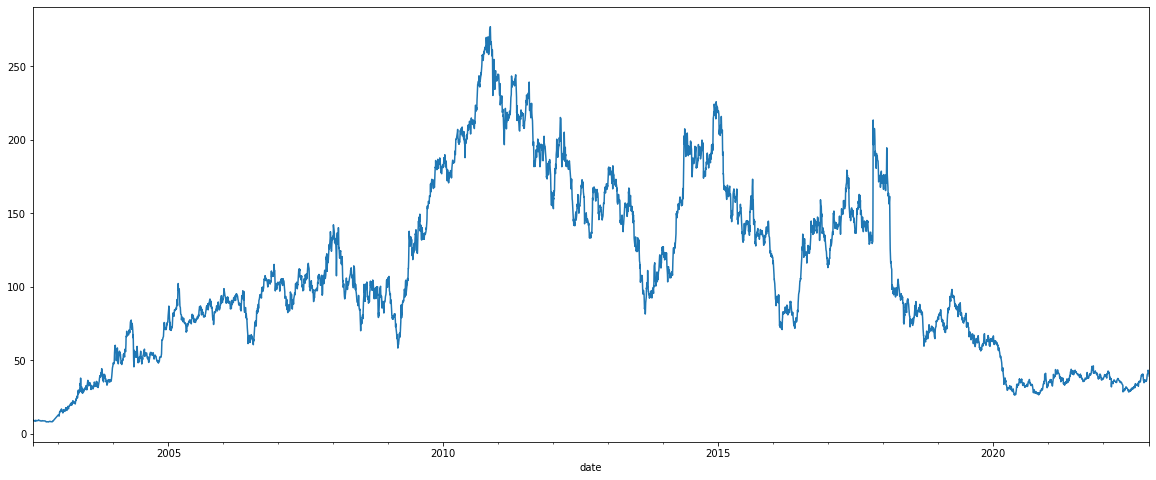

In [25]:
plt.rc("figure", figsize=(20,8))
interpolated.plot()

#### Downsampling Data

In [26]:
# downsample to quarterly intervals
resample = timeseriessq.resample('Q')
downsampled = resample.mean()

In [27]:
downsampled.head()

date
2002-09-30     8.995490
2002-12-31     8.447000
2003-03-31    16.668033
2003-06-30    27.060161
2003-09-30    33.108000
Freq: Q-DEC, Name: close, dtype: float64

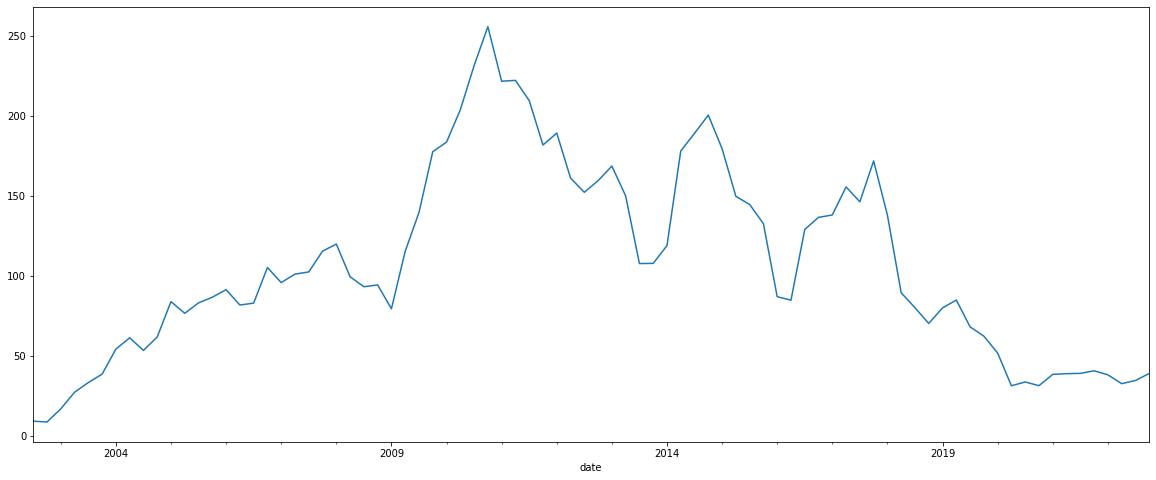

In [28]:
plt.rc("figure", figsize=(20,8))
downsampled.plot()

#### Tranformations

In [29]:
# load and plot a time series
timeseriesdf

,close
date,
2002-07-18,9.380000
2002-07-19,9.300000
2002-07-22,8.960000
2002-07-23,9.120000
2002-07-24,9.140000
...,...
2022-10-27,43.000000
2022-10-28,43.099998
2022-10-31,42.650002


#### Square Root Transform

In [30]:
dataframe = pd.DataFrame(np.sqrt(timeseriesdf.values), columns = ['close'])
dataframe

,close
0,3.062679
1,3.049590
2,2.993326
3,3.019934
4,3.023243
...,...
4995,6.557439
4996,6.565059
4997,6.530697
4998,6.332456


#### Log Transform

In [31]:
dataframe = pd.DataFrame(np.log(timeseriesdf.values), columns = ['close'])
dataframe

,close
0,2.238580
1,2.230014
2,2.192770
3,2.210470
4,2.212660
...,...
4995,3.761200
4996,3.763523
4997,3.753027
4998,3.691376


# Forecasting - Model Based

In [32]:
heatmapdata = data[['date','close']]
heatmapdata['date'] = pd.to_datetime(heatmapdata['date'])
heatmapdata

,date,close
date,,
2002-07-18,2002-07-18,9.380000
2002-07-19,2002-07-19,9.300000
2002-07-22,2002-07-22,8.960000
2002-07-23,2002-07-23,9.120000
2002-07-24,2002-07-24,9.140000
...,...,...
2022-10-27,2022-10-27,43.000000
2022-10-28,2022-10-28,43.099998
2022-10-31,2022-10-31,42.650002


In [33]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

heatmapdata["month"] = heatmapdata['date'].dt.strftime("%b") # month extraction
heatmapdata["year"] = heatmapdata['date'].dt.strftime("%Y") # year extraction
heatmapdata["Day"] = heatmapdata['date'].dt.strftime("%d") # Day extraction
heatmapdata["wkday"] = heatmapdata['date'].dt.strftime("%A") # weekday extraction

heatmapdata

,date,close,month,year,Day,wkday
date,,,,,,
2002-07-18,2002-07-18,9.380000,Jul,2002,18,Thursday
2002-07-19,2002-07-19,9.300000,Jul,2002,19,Friday
2002-07-22,2002-07-22,8.960000,Jul,2002,22,Monday
2002-07-23,2002-07-23,9.120000,Jul,2002,23,Tuesday
2002-07-24,2002-07-24,9.140000,Jul,2002,24,Wednesday
...,...,...,...,...,...,...
2022-10-27,2022-10-27,43.000000,Oct,2022,27,Thursday
2022-10-28,2022-10-28,43.099998,Oct,2022,28,Friday
2022-10-31,2022-10-31,42.650002,Oct,2022,31,Monday


In [34]:
heatmap_y_month = pd.pivot_table(data = heatmapdata,
                                 values = "close",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
heatmap_y_month1 = heatmap_y_month[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
heatmap_y_month1

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.995000,9.101905,8.884000,8.393810,8.505789,0.000000
2003,14.853913,16.428947,19.103158,21.538500,29.313333,30.065714,33.226087,32.486000,33.550000,39.527727,36.612632,38.725910
2004,53.683809,51.417368,56.541364,70.777895,60.869524,52.929545,53.224091,52.353636,53.985000,50.817894,57.241501,74.317391
2005,76.378421,84.272501,89.451818,75.986000,75.074546,78.066363,80.401500,82.411818,85.862857,84.387001,85.222105,89.360455
2006,92.992500,88.368947,91.890455,88.644117,89.555000,68.143637,66.519047,83.956818,97.742381,104.544211,106.370475,104.064500
2007,102.335999,96.263685,88.647619,93.437500,106.360476,102.492380,108.677273,96.914091,101.063499,103.138637,114.207728,130.442631
2008,131.318260,123.675237,100.092223,105.207000,104.820501,88.212858,84.898261,95.489000,99.856000,93.880500,92.620000,95.647143
2009,91.676000,76.092631,69.758001,94.107647,119.698001,127.242728,136.029132,135.842381,147.052000,168.499999,180.848000,182.116191
2010,183.018421,176.378947,190.084762,202.716500,201.360476,206.440455,211.504091,231.150000,251.799048,263.408571,260.360952,243.392727


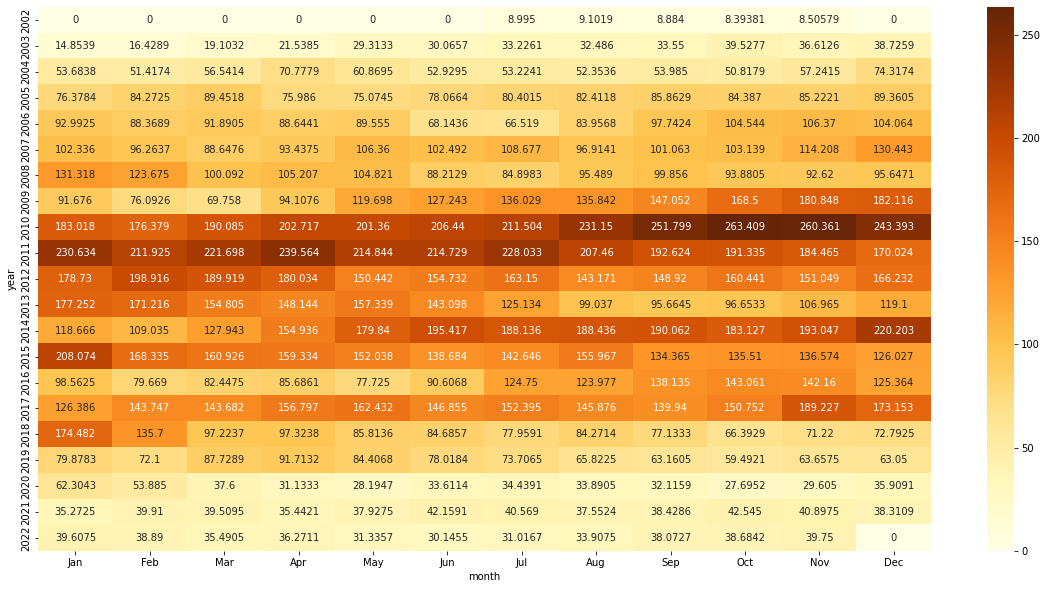

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(heatmap_y_month1,
            annot=True,
            fmt="g",
            cmap = 'YlOrBr') 

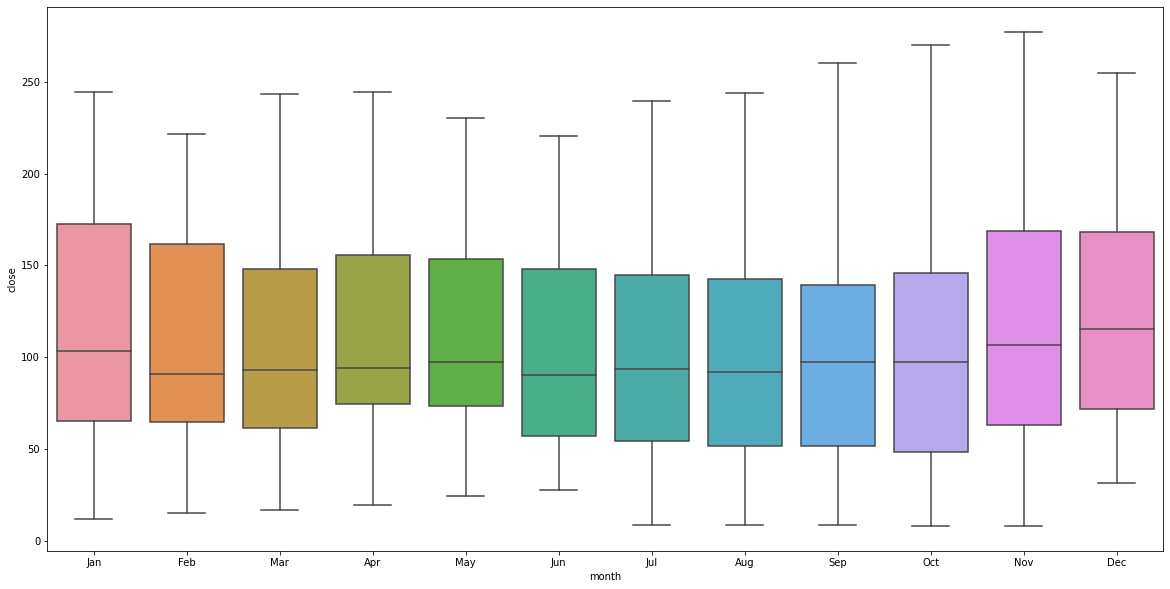

In [36]:
# Boxplot for every
plt.figure(figsize=(20,10))
sns.boxplot(x="month",y="close",data=heatmapdata, order = ["Jan", "Feb","Mar", "Apr","May", "Jun","Jul", "Aug","Sep", "Oct","Nov", "Dec"])


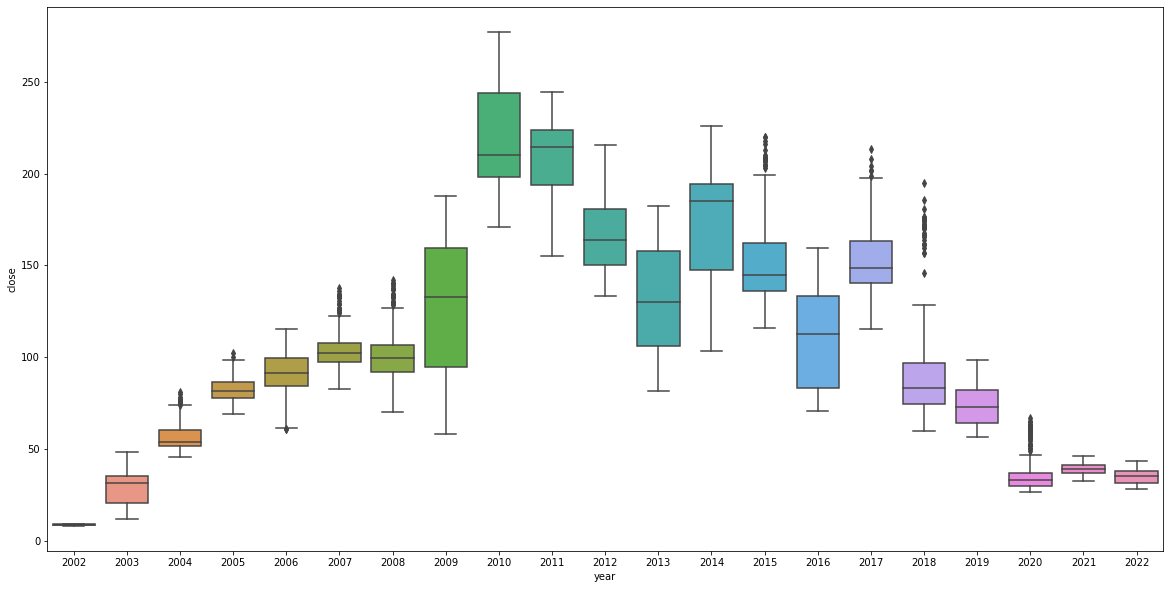

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(x="year",y="close",data=heatmapdata)

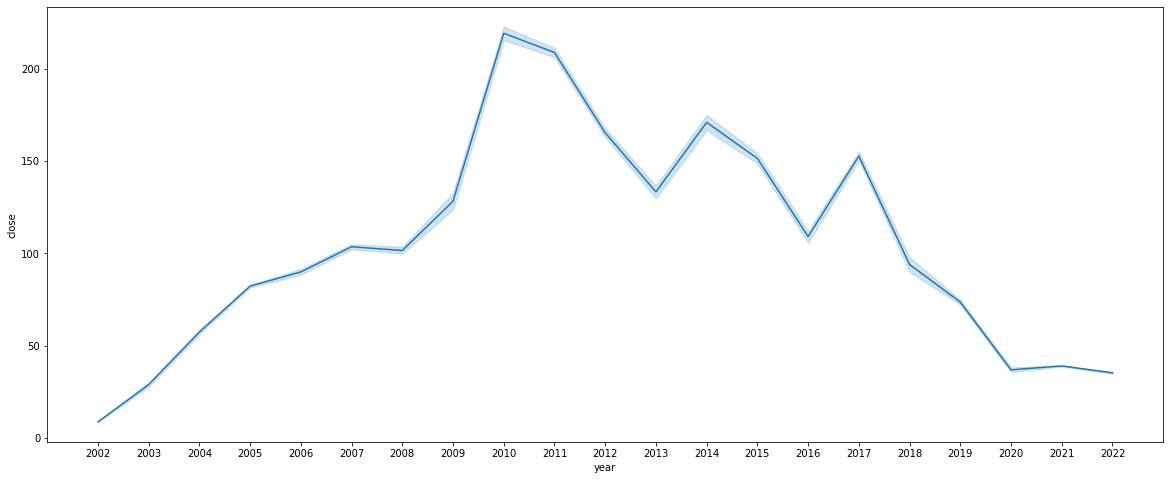

In [38]:
sns.lineplot(x="year",y="close",data=heatmapdata)

#### Splitting data

In [39]:
data1 = heatmapdata
data1

,date,close,month,year,Day,wkday
date,,,,,,
2002-07-18,2002-07-18,9.380000,Jul,2002,18,Thursday
2002-07-19,2002-07-19,9.300000,Jul,2002,19,Friday
2002-07-22,2002-07-22,8.960000,Jul,2002,22,Monday
2002-07-23,2002-07-23,9.120000,Jul,2002,23,Tuesday
2002-07-24,2002-07-24,9.140000,Jul,2002,24,Wednesday
...,...,...,...,...,...,...
2022-10-27,2022-10-27,43.000000,Oct,2022,27,Thursday
2022-10-28,2022-10-28,43.099998,Oct,2022,28,Friday
2022-10-31,2022-10-31,42.650002,Oct,2022,31,Monday


In [40]:
data1['t'] = np.arange(1,data1.shape[0]+1)
data1['t_square'] = np.square(data1.t)
data1['log_close'] = np.log(data1.close)
data2 = pd.get_dummies(data1['month'])
data1 = pd.concat([data1, data2],axis=1)
data1 = data1.reset_index(drop = True)
data1

,date,close,month,year,Day,wkday,t,t_square,log_close,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2002-07-18,9.380000,Jul,2002,18,Thursday,1,1,2.238580,0,...,0,0,0,1,0,0,0,0,0,0
1,2002-07-19,9.300000,Jul,2002,19,Friday,2,4,2.230014,0,...,0,0,0,1,0,0,0,0,0,0
2,2002-07-22,8.960000,Jul,2002,22,Monday,3,9,2.192770,0,...,0,0,0,1,0,0,0,0,0,0
3,2002-07-23,9.120000,Jul,2002,23,Tuesday,4,16,2.210470,0,...,0,0,0,1,0,0,0,0,0,0
4,2002-07-24,9.140000,Jul,2002,24,Wednesday,5,25,2.212660,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2022-10-27,43.000000,Oct,2022,27,Thursday,4996,24960016,3.761200,0,...,0,0,0,0,0,0,0,0,1,0
4996,2022-10-28,43.099998,Oct,2022,28,Friday,4997,24970009,3.763523,0,...,0,0,0,0,0,0,0,0,1,0
4997,2022-10-31,42.650002,Oct,2022,31,Monday,4998,24980004,3.753027,0,...,0,0,0,0,0,0,0,0,1,0
4998,2022-11-01,40.099998,Nov,2022,01,Tuesday,4999,24990001,3.691376,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Using 3/4th data for training and remaining for testing
test_size = round(0.25 * (data1.shape[0]+1))

Train = data1[:-test_size]
Test = data1[-test_size:]

In [42]:
Train

,date,close,month,year,Day,wkday,t,t_square,log_close,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2002-07-18,9.38,Jul,2002,18,Thursday,1,1,2.238580,0,...,0,0,0,1,0,0,0,0,0,0
1,2002-07-19,9.30,Jul,2002,19,Friday,2,4,2.230014,0,...,0,0,0,1,0,0,0,0,0,0
2,2002-07-22,8.96,Jul,2002,22,Monday,3,9,2.192770,0,...,0,0,0,1,0,0,0,0,0,0
3,2002-07-23,9.12,Jul,2002,23,Tuesday,4,16,2.210470,0,...,0,0,0,1,0,0,0,0,0,0
4,2002-07-24,9.14,Jul,2002,24,Wednesday,5,25,2.212660,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2017-10-09,137.30,Oct,2017,09,Monday,3746,14032516,4.922168,0,...,0,0,0,0,0,0,0,0,1,0
3746,2017-10-10,137.00,Oct,2017,10,Tuesday,3747,14040009,4.919981,0,...,0,0,0,0,0,0,0,0,1,0
3747,2017-10-11,131.70,Oct,2017,11,Wednesday,3748,14047504,4.880527,0,...,0,0,0,0,0,0,0,0,1,0
3748,2017-10-12,133.80,Oct,2017,12,Thursday,3749,14055001,4.896346,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
Test

,date,close,month,year,Day,wkday,t,t_square,log_close,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
3750,2017-10-16,133.850010,Oct,2017,16,Monday,3751,14070001,4.896720,0,...,0,0,0,0,0,0,0,0,1,0
3751,2017-10-17,134.399990,Oct,2017,17,Tuesday,3752,14077504,4.900820,0,...,0,0,0,0,0,0,0,0,1,0
3752,2017-10-18,130.899990,Oct,2017,18,Wednesday,3753,14085009,4.874434,0,...,0,0,0,0,0,0,0,0,1,0
3753,2017-10-19,129.550000,Oct,2017,19,Thursday,3754,14092516,4.864067,0,...,0,0,0,0,0,0,0,0,1,0
3754,2017-10-23,131.000000,Oct,2017,23,Monday,3755,14100025,4.875197,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2022-10-27,43.000000,Oct,2022,27,Thursday,4996,24960016,3.761200,0,...,0,0,0,0,0,0,0,0,1,0
4996,2022-10-28,43.099998,Oct,2022,28,Friday,4997,24970009,3.763523,0,...,0,0,0,0,0,0,0,0,1,0
4997,2022-10-31,42.650002,Oct,2022,31,Monday,4998,24980004,3.753027,0,...,0,0,0,0,0,0,0,0,1,0
4998,2022-11-01,40.099998,Nov,2022,01,Tuesday,4999,24990001,3.691376,0,...,0,0,0,0,0,0,0,1,0,0


### Trying basic models

In [44]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('close~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['close'])-np.array(pred_linear))**2))
rmse_linear

153.26911622209124

In [45]:
#Exponential
Exp = smf.ols('log_close~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['close'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

251.89746568463937

In [46]:
#Quadratic 
Quad = smf.ols('close~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['close'])-np.array(pred_Quad))**2))
rmse_Quad

27.854739369828454

In [47]:
#Additive seasonality 
add_sea = smf.ols('close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['close'])-np.array(pred_add_sea))**2))
rmse_add_sea

72.03957960837754

In [48]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('close~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['close'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

27.588591727892428

In [49]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['close'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

57.39948520796812

In [50]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_close~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['close'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

251.41131316124844

In [51]:
#Compare the results 
datamodel = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(datamodel)
table = table_rmse.sort_values(['RMSE_Values'],ignore_index = True)
table

,MODEL,RMSE_Values
0,rmse_add_sea_quad,27.588592
1,rmse_Quad,27.854739
2,rmse_Mult_sea,57.399485
3,rmse_add_sea,72.039580
4,rmse_linear,153.269116
5,rmse_Mult_add_sea,251.411313
6,rmse_Exp,251.897466


In [52]:
bestmodel = table.iloc[0,0]
bestmodel

if bestmodel == "rmse_linear" :
  formula = 'close~t'

if bestmodel == "rmse_Exp":
  formula = 'log_close~t'

if bestmodel == "rmse_Quad" :
  formula = 'close~t+t_square'

if bestmodel == "rmse_add_sea":
  formula = 'close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov'

if bestmodel == "rmse_add_sea_quad":
  formula = 'close~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov'

if bestmodel == "rmse_Mult_sea":
  formula = 'log_close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov'

if bestmodel == "rmse_Mult_add_sea":
  formula = 'log_close~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov'

formula

'close~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov'

In [53]:
#Build the model on entire data set
model_full = smf.ols(formula,data=data1).fit()

In [54]:
pred_new  = pd.Series(model_full.predict(data1))
pred_new

0      -4.046347
1      -3.911870
2      -3.777446
3      -3.643077
4      -3.508762
          ...   
4995   -5.754593
4996   -5.890844
4997   -6.027150
4998   -3.096820
4999   -3.233233
Length: 5000, dtype: float64

In [55]:
if bestmodel == ("rmse_Exp" or "rmse_Mult_sea" or "rmse_Mult_add_sea"):
  data1["forecasted_close"] = pd.Series(np.exp(pred_new))
else:
  data1["forecasted_close"] = pd.Series((pred_new))

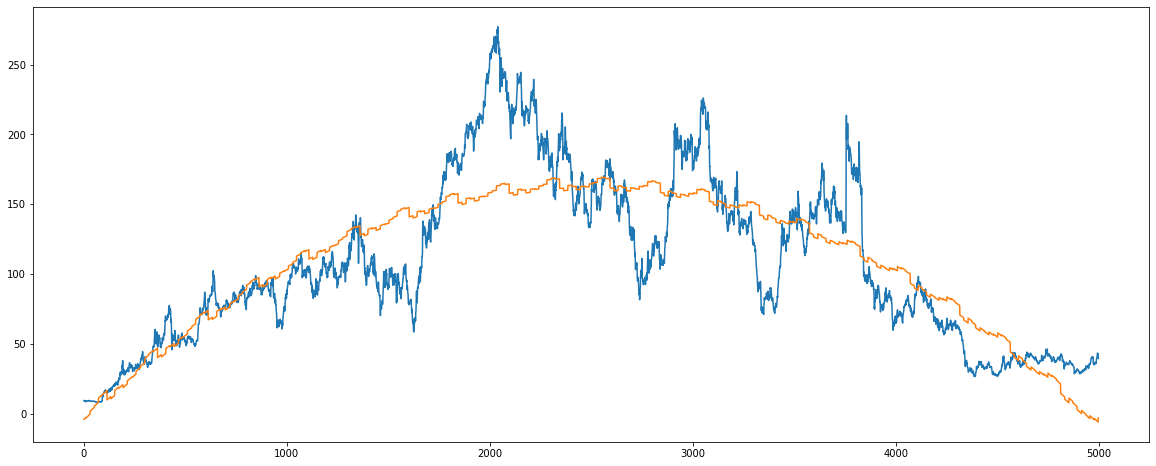

In [56]:
plt.figure(figsize = (20,8))

plt.plot(data1[['close','forecasted_close']].reset_index(drop=True))

In [57]:
data1

,date,close,month,year,Day,wkday,t,t_square,log_close,Apr,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_close
0,2002-07-18,9.380000,Jul,2002,18,Thursday,1,1,2.238580,0,...,0,0,1,0,0,0,0,0,0,-4.046347
1,2002-07-19,9.300000,Jul,2002,19,Friday,2,4,2.230014,0,...,0,0,1,0,0,0,0,0,0,-3.911870
2,2002-07-22,8.960000,Jul,2002,22,Monday,3,9,2.192770,0,...,0,0,1,0,0,0,0,0,0,-3.777446
3,2002-07-23,9.120000,Jul,2002,23,Tuesday,4,16,2.210470,0,...,0,0,1,0,0,0,0,0,0,-3.643077
4,2002-07-24,9.140000,Jul,2002,24,Wednesday,5,25,2.212660,0,...,0,0,1,0,0,0,0,0,0,-3.508762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2022-10-27,43.000000,Oct,2022,27,Thursday,4996,24960016,3.761200,0,...,0,0,0,0,0,0,0,1,0,-5.754593
4996,2022-10-28,43.099998,Oct,2022,28,Friday,4997,24970009,3.763523,0,...,0,0,0,0,0,0,0,1,0,-5.890844
4997,2022-10-31,42.650002,Oct,2022,31,Monday,4998,24980004,3.753027,0,...,0,0,0,0,0,0,0,1,0,-6.027150
4998,2022-11-01,40.099998,Nov,2022,01,Tuesday,4999,24990001,3.691376,0,...,0,0,0,0,0,0,1,0,0,-3.096820


# Forecasting - Data Driven

In [58]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 


#### Moving Average 

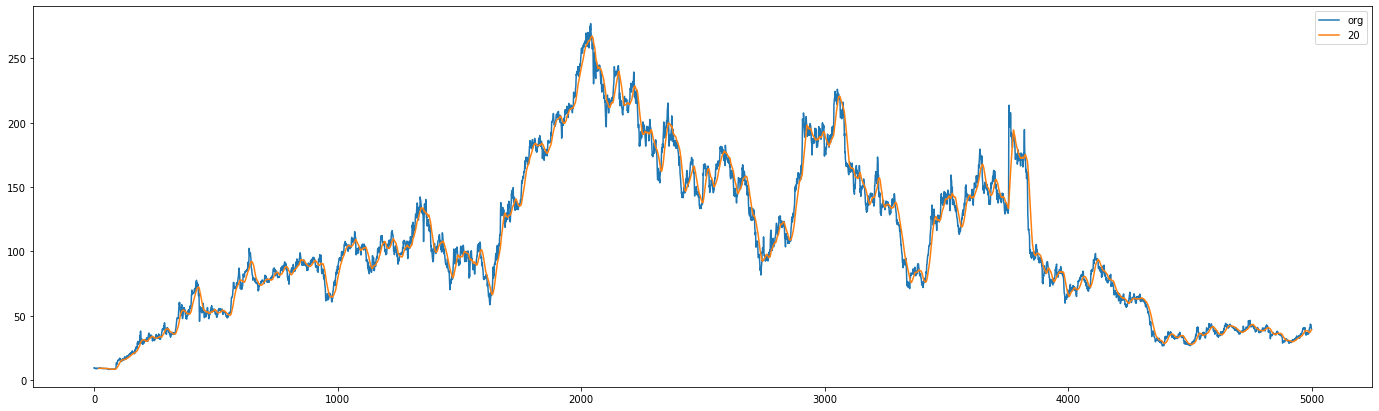

In [59]:
x=20

plt.figure(figsize=(24,7))
data1['close'].plot(label="org")
data1["close"].rolling(x).mean().plot(label=str(x))
plt.legend(loc='best')

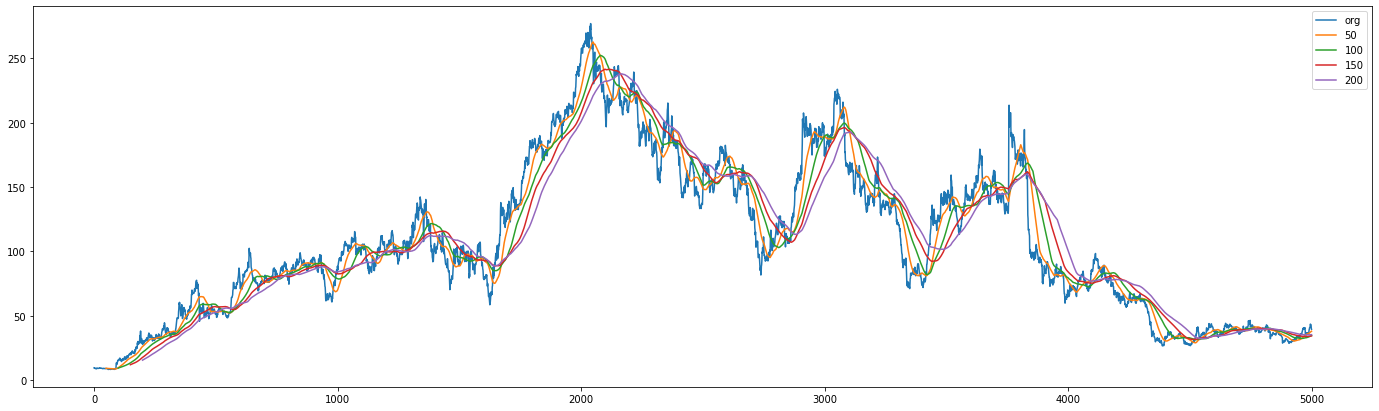

In [60]:
plt.figure(figsize=(24,7))
data1['close'].plot(label="org")
for i in range(50,201,50):
    data1["close"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#### Time series decomposition plot 


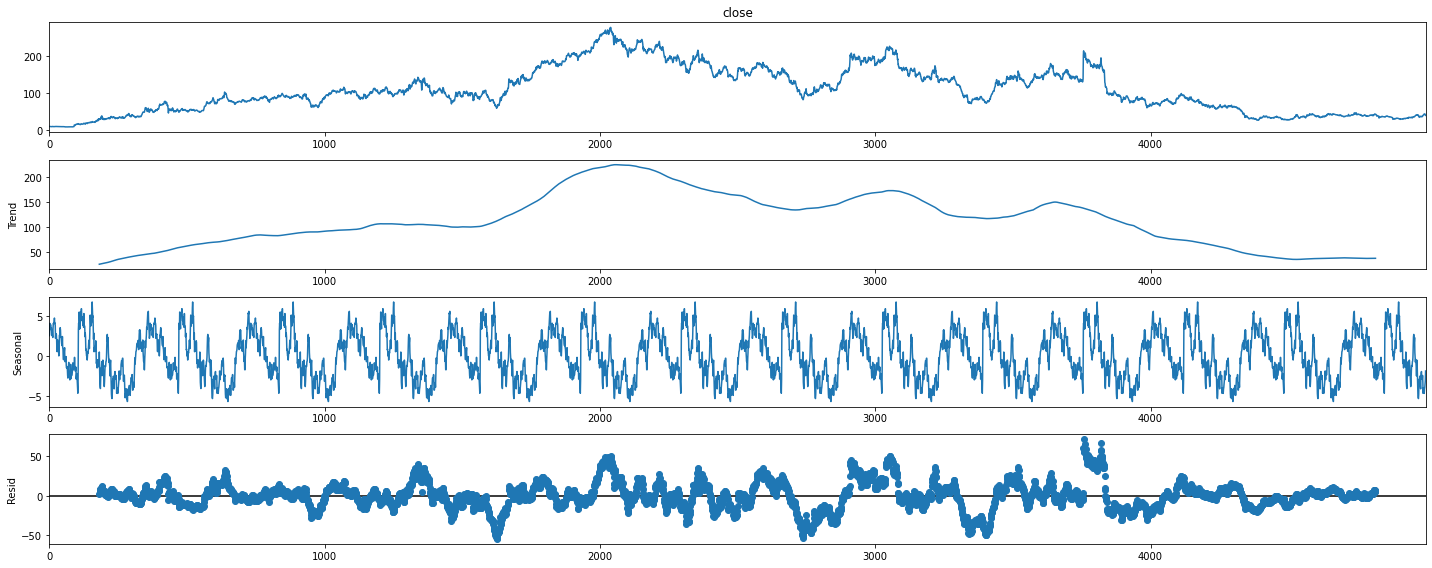

In [61]:
decompose_ts_add = seasonal_decompose(data1['close'], period = 365)
decompose_ts_add.plot()

plt.show()

#### ACF plots and PACF plots


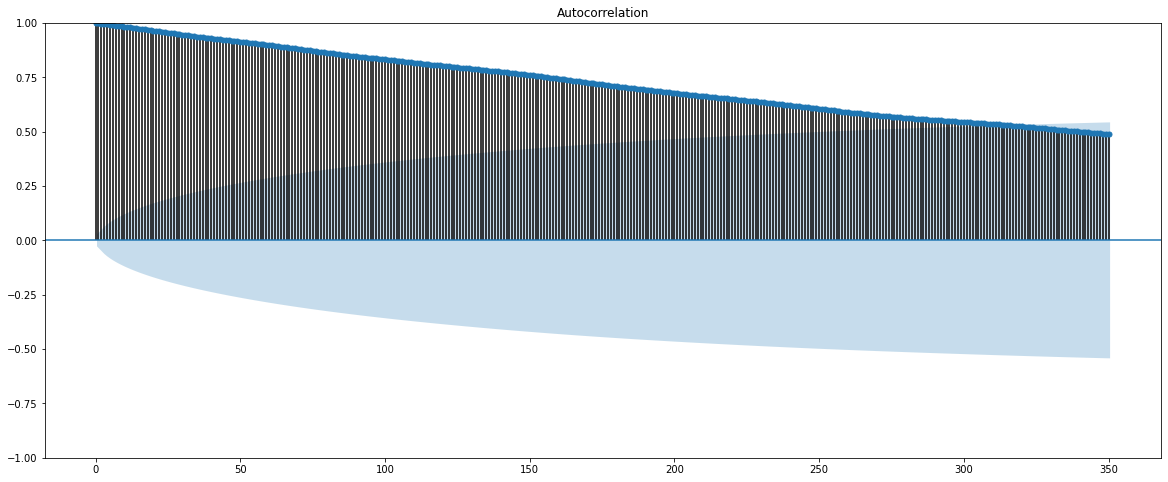

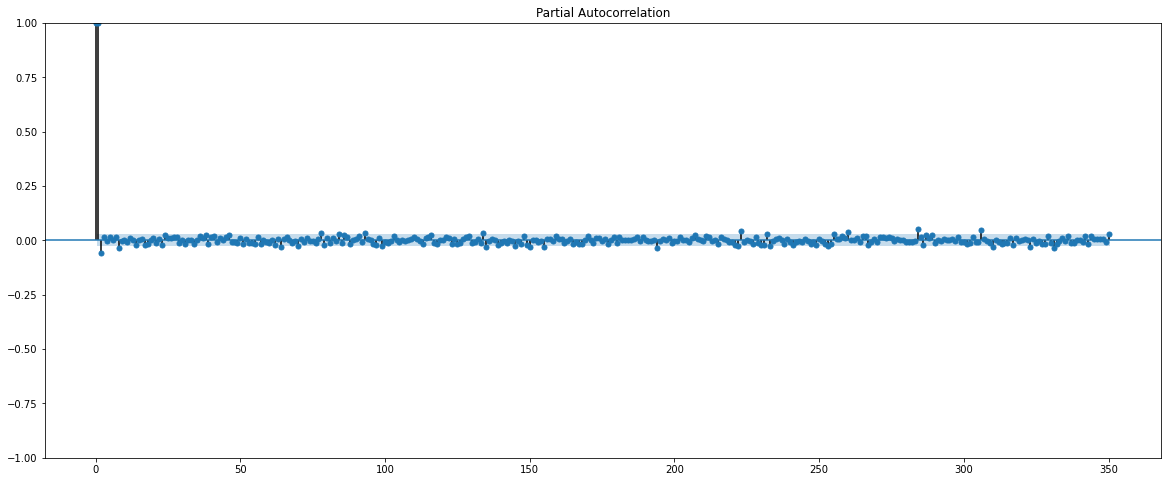

In [62]:
tsa_plots.plot_acf(data1.close,lags=350)
tsa_plots.plot_pacf(data1.close,lags=350)
plt.show()

### Evaluation Metric RMSE

In [63]:
def RMSE(pred,org):
  MSE = np.square(np.subtract(org,pred)).mean()   
  return np.sqrt(MSE) 

### Simple Exponential Method


In [64]:
ses_model = SimpleExpSmoothing(Train["close"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmseses = RMSE(pred_ses,Test.close)

### Holt method 

In [65]:
# Holt method 
hw_model = Holt(Train["close"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmsehw = RMSE(pred_hw,Test.close) 

### Holts winter exponential smoothing with additive seasonality and additive trend


In [66]:
hwe_model_add_add = ExponentialSmoothing(Train["close"],seasonal="add",trend="add",seasonal_periods=365).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmsehwaa = RMSE(pred_hwe_add_add,Test.close) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [67]:
hwe_model_mul_add = ExponentialSmoothing(Train["close"],seasonal="mul",trend="add",seasonal_periods=365).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmsehwma = RMSE(pred_hwe_mul_add,Test.close)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



### Final Model by combining train and test

In [68]:
#Compare the results 
datamodel1 = {"MODEL":pd.Series(["rmse_ses","rmse_hw","rmse_hwe_add_add","rmse_hwe_mul_add"]),"RMSE_Values":pd.Series([rmseses,rmsehw,rmsehwaa,rmsehwma])}
table_rmse1 = pd.DataFrame(datamodel1)
table1 = table_rmse1.sort_values(['RMSE_Values'],ignore_index = True)
table1

,MODEL,RMSE_Values
0,rmse_ses,82.052886
1,rmse_hwe_mul_add,105.262171
2,rmse_hwe_add_add,112.788815
3,rmse_hw,132.598796


In [69]:
bestmodel1 = table1.iloc[0,0]
bestmodel1

if bestmodel1 == "rmse_hwe_add_add" :
  formula1 = ExponentialSmoothing(data["close"],seasonal="add",trend="add",seasonal_periods=365).fit()

if bestmodel1 == "rmse_hwe_mul_add":
  formula1 = ExponentialSmoothing(data["close"],seasonal="mul",trend="add",seasonal_periods=365).fit()

if bestmodel1 == "rmse_ses" :
  formula1 = SimpleExpSmoothing(data["close"]).fit(smoothing_level=0.2)

if bestmodel1 == "rmse_hw":
  formula1 = Holt(data["close"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [70]:
#Forecasting for next 12 time periods
forecasted = formula1.forecast(730)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



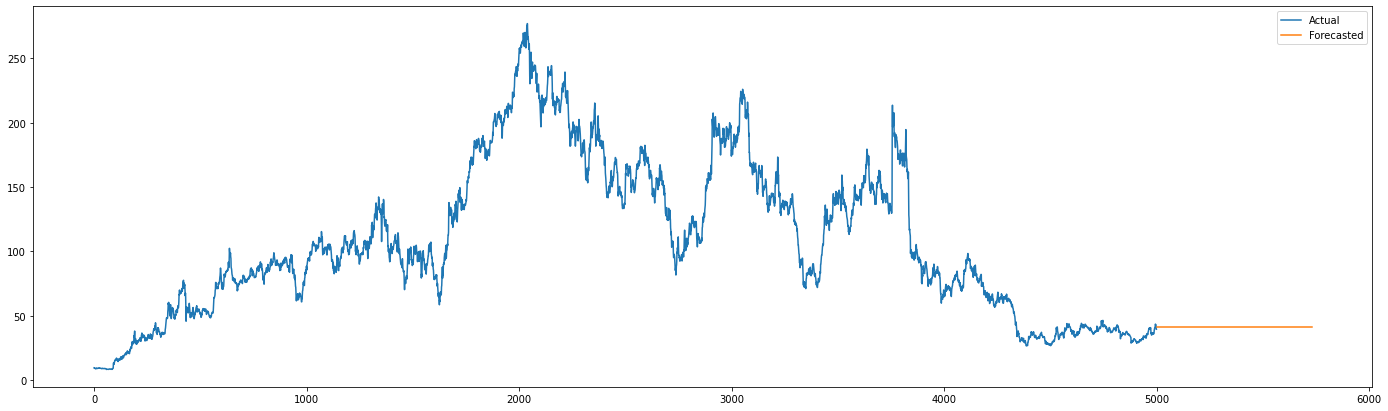

In [71]:
plt.figure(figsize=(24,7))
plt.plot(data1.close, label = "Actual")
plt.plot(forecasted, label = "Forecasted")
plt.legend()

# Forecasting using ARIMA,SARIMA and SARIMAX model

### Checking if the data is stationary or not

In [72]:
timeseriesdf

,close
date,
2002-07-18,9.380000
2002-07-19,9.300000
2002-07-22,8.960000
2002-07-23,9.120000
2002-07-24,9.140000
...,...
2022-10-27,43.000000
2022-10-28,43.099998
2022-10-31,42.650002


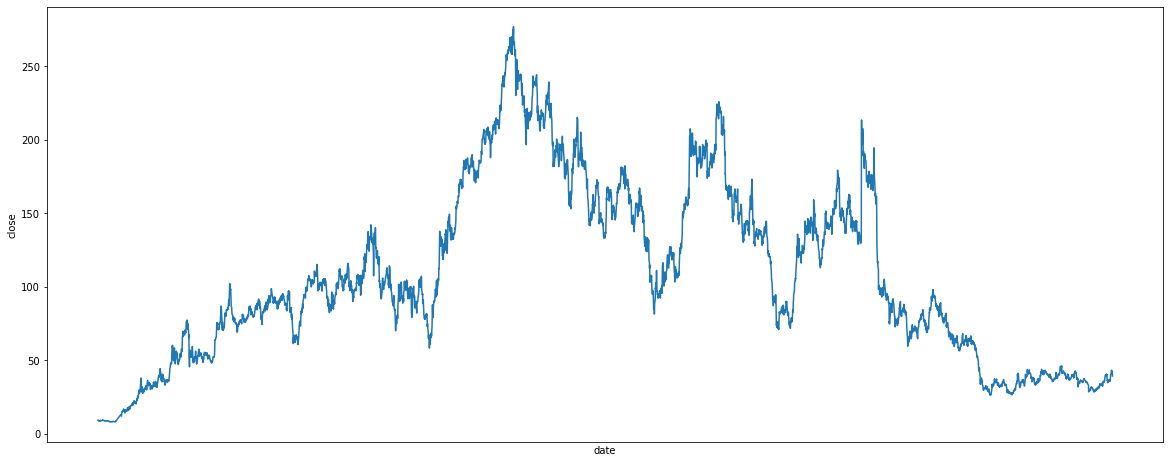

In [73]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

fig=plt.figure(figsize=(20,8))
sns.lineplot(data=timeseriesdf,x='date',y='close')
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

### Augmented Dickey-Fuller Test

In [74]:
result=adfuller (timeseriesdf['close'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -2.049602
p-value: 0.265257
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


### Kwiatkowski Phillips Schmidt Shin (KPSS) test

In [75]:
result_kpss_ct=kpss(timeseriesdf['close'],regression="ct")
print('Test Statistic: %f' %result_kpss_ct[0])
print('p-value: %f' %result_kpss_ct[1])
print('Critical values:')
for key, value in result_kpss_ct[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 2.270353
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [76]:
## Test Statistic in both Tests is greater than standard 0.05
## Hence the data can be classified as not Stationary

#### Trying to make data stationary

In [77]:
''' 
Steps that can be used to make data stationary
    Log transforming of the data
    Taking the square root of the data
    Taking the cube root
    Proportional change

    The steps for transformation are simple, this project uses square root transformation.

    Use NumPy’s square root function to transform the required column
    Then shift the transformation by one using the “shift’ function.
    Take the difference between both the original transformation and shift.
    Steps 2 and 3 can be done by just using the pandas “diff” function.
    
'''
#Transforming of the data

df_log=np.sqrt(timeseriesdf['close'])
df_diff=df_log.diff().dropna()
result=adfuller (df_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -66.775889
p-value: 0.000000
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [78]:
result_kpss_ct_log=kpss(df_diff,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.030000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [79]:
df_diff

date
2002-07-19   -0.013088
2002-07-22   -0.056264
2002-07-23    0.026608
2002-07-24    0.003310
2002-07-25   -0.003310
                ...   
2022-10-27   -0.022835
2022-10-28    0.007620
2022-10-31   -0.034362
2022-11-01   -0.198241
2022-11-02   -0.055514
Name: close, Length: 4999, dtype: float64

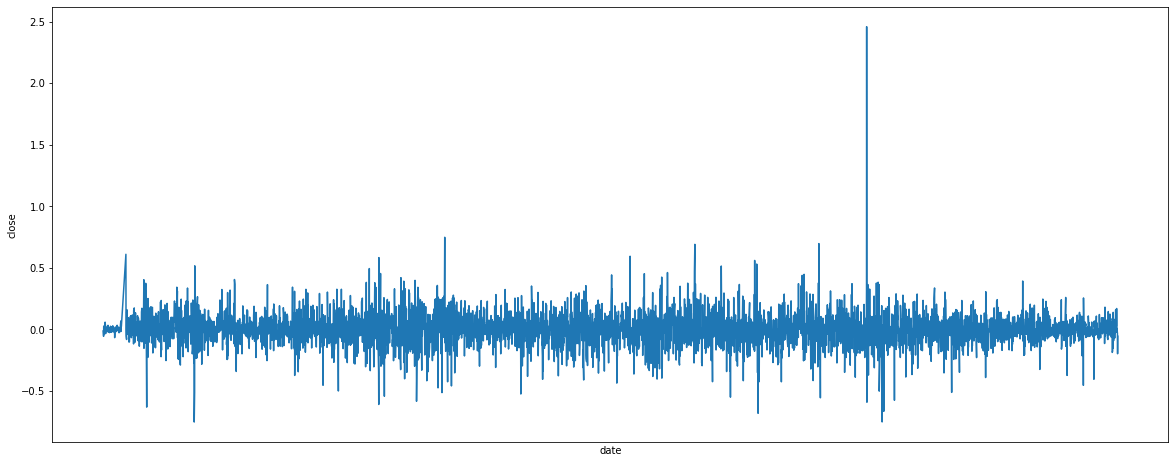

In [80]:
fig=plt.figure(figsize=(20,8))
sns.lineplot(data=df_diff)
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

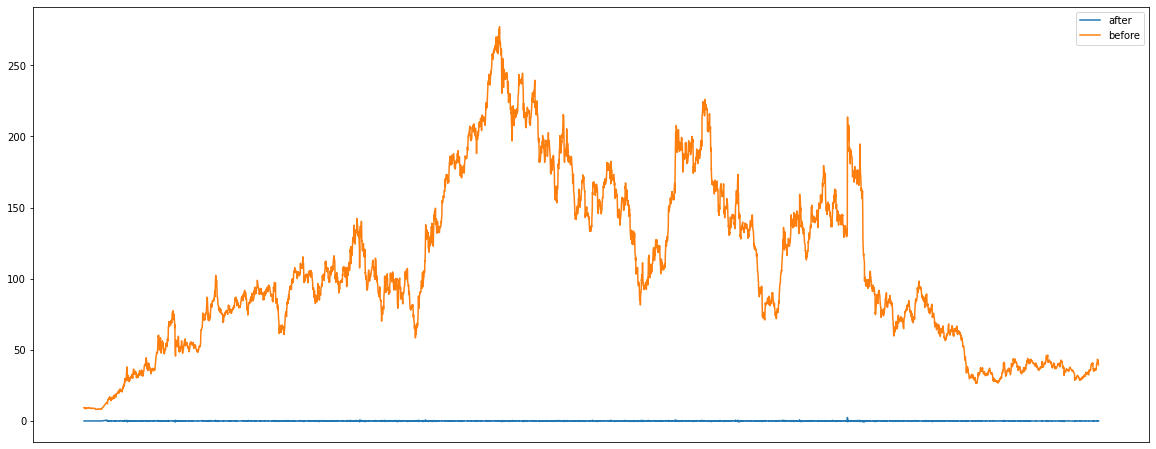

In [81]:
## Values of both the test statistics is below the standard value of 0.05

plt.figure(figsize=(20,8))
plt.plot(df_diff,label="after")
plt.plot(timeseriesdf,label="before")
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False)
plt.legend()
plt.show() 

In [82]:
df_diff

date
2002-07-19   -0.013088
2002-07-22   -0.056264
2002-07-23    0.026608
2002-07-24    0.003310
2002-07-25   -0.003310
                ...   
2022-10-27   -0.022835
2022-10-28    0.007620
2022-10-31   -0.034362
2022-11-01   -0.198241
2022-11-02   -0.055514
Name: close, Length: 4999, dtype: float64

In [83]:
stationarydf1 = df_diff

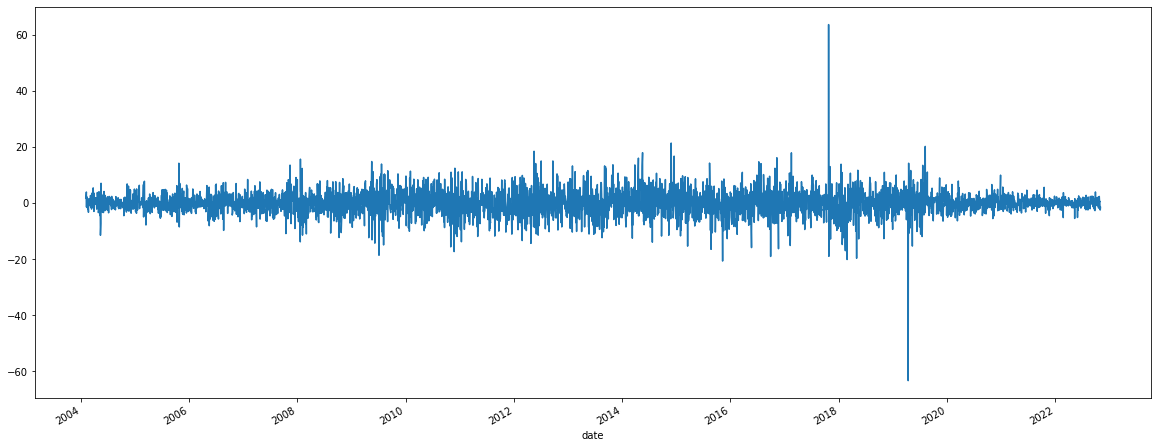

In [84]:
## We can also use basic differencing method to make data stationary

df_diffex = timeseriesdf.diff().diff(365).dropna()
diff_v2ex = timeseriesdf['close'].diff().diff(365).dropna()
time_seriesex = timeseriesdf.index
time_seriesex = time_seriesex.to_frame(index = True)
diff_v2ex.plot()

In [85]:
result=adfuller (diff_v2ex)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -13.310683
p-value: 0.000000
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [86]:
result_kpss_ct_log=kpss(diff_v2ex,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.030000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




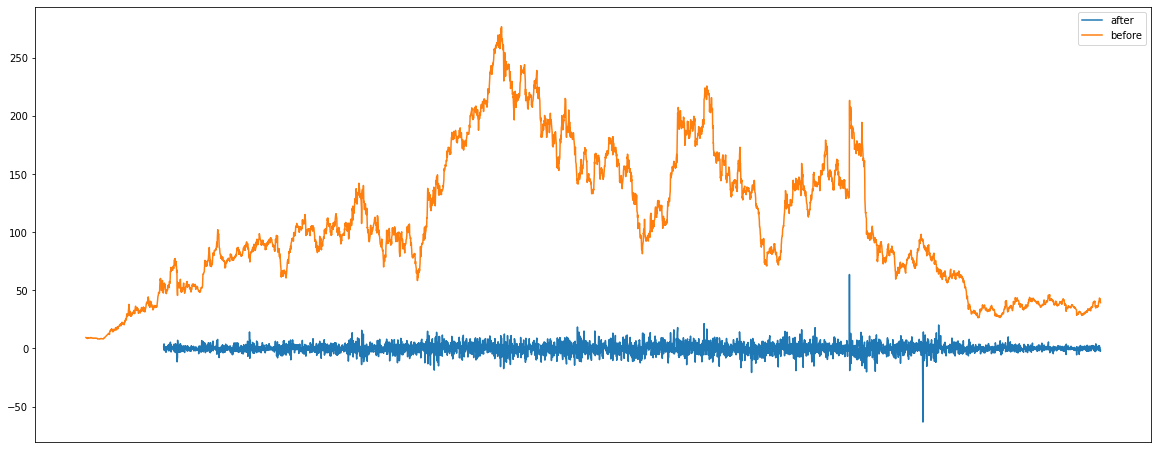

In [87]:
plt.figure(figsize=(20,8))
plt.plot(diff_v2ex,label="after")
plt.plot(timeseriesdf,label="before")
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False)
plt.legend()
plt.show() 

In [88]:
diff_v2ex

date
2004-02-06    1.699998
2004-02-09    3.930002
2004-02-10   -1.450002
2004-02-11    2.270001
2004-02-12   -1.420001
                ...   
2022-10-27    0.350003
2022-10-28    0.649997
2022-10-31   -2.499995
2022-11-01   -2.250005
2022-11-02   -1.550001
Name: close, Length: 4634, dtype: float64

In [89]:
stationarydf2 = diff_v2ex

In [90]:
# Let's use original and both these stationary datasets for Auto-ARIMA


In [91]:
test_size = round((timeseriesdf.shape[0]) - 730)

Train = timeseriesdf[:test_size]
Test = timeseriesdf[test_size:]

In [92]:
# Auto ARIMA on complete Dataset
import itertools
from math import sqrt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [93]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(data1['close'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

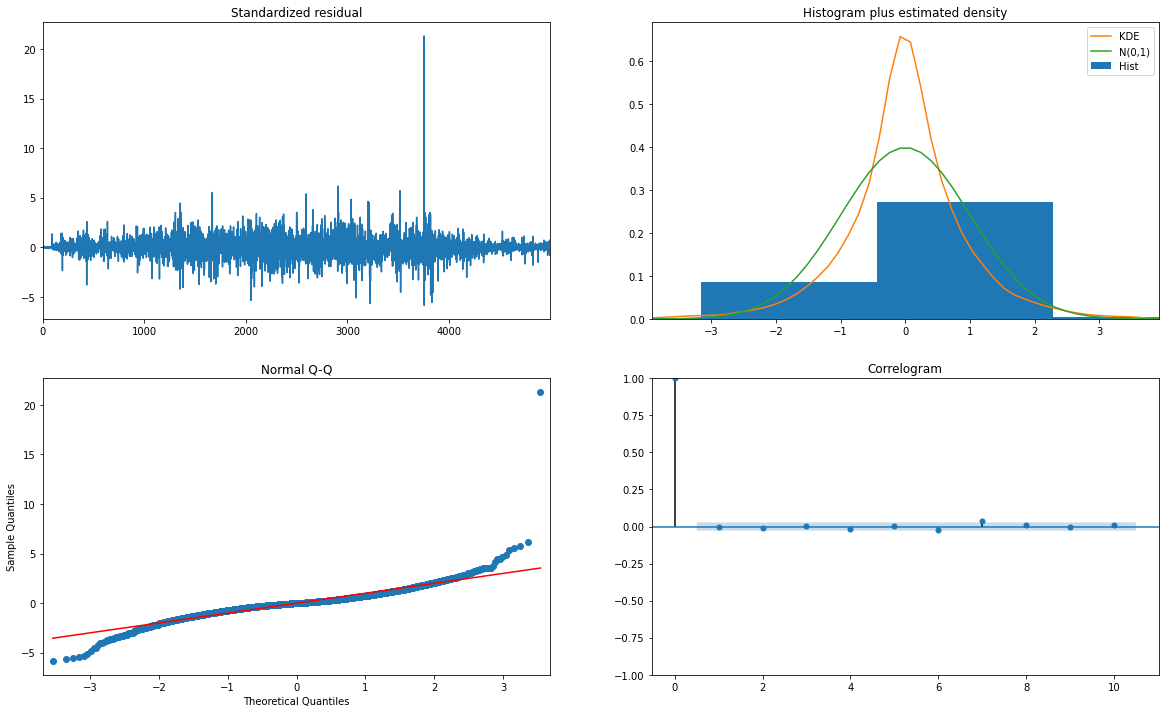

In [94]:
ARIMA_model.plot_diagnostics(figsize=(20,12))
plt.show()

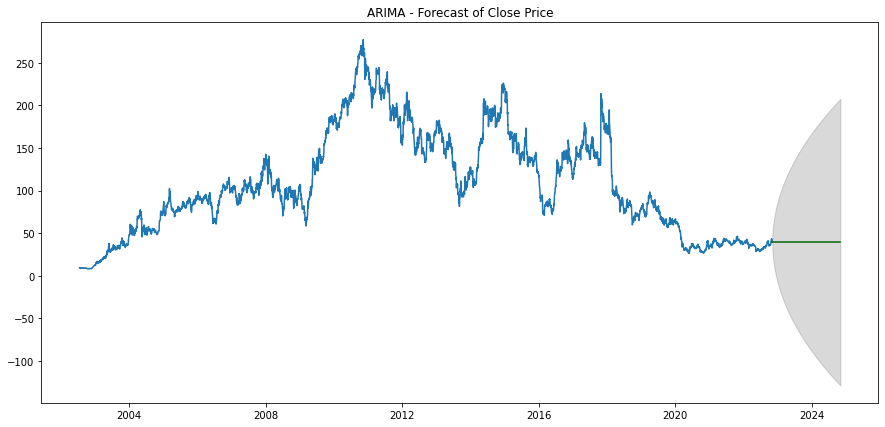

In [95]:
from pandas.tseries.frequencies import DAYS
def forecast(ARIMA_model, periods=730):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D')
    
    # make series for plotting purpose
    fitted_series = pd.Series(fitted.values, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(data["close"])
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA - Forecast of Close Price")
    plt.show()

forecast(ARIMA_model)

# Naive Predictions / Persistence / Base model

In [96]:
# evaluate a persistence model
print('Dataset %d, Validation %d' % (len(Train), len(Test)))

train = Train.close.values.astype('float32')

test = Test.close.values.astype('float32')

Dataset 4270, Validation 730


In [97]:
# walk-forward validation
history = [x for x in train]
history

[9.38,
 9.3,
 8.96,
 9.12,
 9.14,
 9.12,
 8.91,
 8.7,
 8.74,
 8.58,
 8.8,
 9.15,
 9.32,
 9.11,
 8.95,
 8.96,
 8.87,
 8.91,
 8.89,
 9.0,
 9.11,
 9.24,
 9.37,
 9.2699995,
 9.15,
 9.35,
 9.29,
 9.18,
 9.059999,
 9.030001,
 9.13,
 9.1,
 8.940001,
 8.91,
 8.86,
 8.82,
 8.7,
 8.85,
 8.85,
 8.969999,
 9.07,
 8.93,
 8.84,
 8.84,
 8.88,
 8.9,
 8.79,
 8.82,
 8.7699995,
 8.940001,
 8.9,
 8.88,
 8.83,
 8.76,
 8.76,
 8.719999,
 8.559999,
 8.530001,
 8.14,
 8.190001,
 8.3,
 8.26,
 8.280001,
 8.33,
 8.280001,
 8.2,
 8.1,
 8.09,
 8.14,
 8.33,
 8.280001,
 8.309999,
 8.45,
 8.530001,
 8.6,
 8.59,
 8.5199995,
 8.4,
 8.24,
 8.2699995,
 8.36,
 8.34,
 8.35,
 8.24,
 8.18,
 8.37,
 8.7699995,
 8.67,
 8.780001,
 8.9,
 9.05,
 13.089999,
 13.07,
 12.68,
 12.1,
 13.110001,
 13.7,
 14.9,
 14.9800005,
 15.43,
 15.110001,
 15.7300005,
 15.81,
 15.530001,
 16.28,
 16.86,
 16.36,
 16.7,
 15.860001,
 15.08,
 15.15,
 15.110001,
 14.710001,
 14.289999,
 15.1,
 15.7300005,
 15.610001,
 16.5,
 16.25,
 15.710001,
 15.65,
 15

In [98]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=63.700, Expected=66.950
>Predicted=66.950, Expected=65.600
>Predicted=65.600, Expected=65.750
>Predicted=65.750, Expected=62.900
>Predicted=62.900, Expected=63.750
>Predicted=63.750, Expected=62.300
>Predicted=62.300, Expected=60.200
>Predicted=60.200, Expected=60.800
>Predicted=60.800, Expected=59.650
>Predicted=59.650, Expected=59.550
>Predicted=59.550, Expected=60.800
>Predicted=60.800, Expected=64.450
>Predicted=64.450, Expected=63.700
>Predicted=63.700, Expected=64.700
>Predicted=64.700, Expected=63.200
>Predicted=63.200, Expected=63.600
>Predicted=63.600, Expected=64.650
>Predicted=64.650, Expected=63.650
>Predicted=63.650, Expected=63.500
>Predicted=63.500, Expected=62.800
>Predicted=62.800, Expected=65.350
>Predicted=65.350, Expected=64.400
>Predicted=64.400, Expected=64.350
>Predicted=64.350, Expected=64.700
>Predicted=64.700, Expected=66.700
>Predicted=66.700, Expected=65.050
>Predicted=65.050, Expected=61.400
>Predicted=61.400, Expected=61.850
>Predicted=61.850, E

In [99]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 1.045


#LSTM ANN

In [100]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [101]:
data

,symbol,open,high,low,close,volume,date,returns percentage
date,,,,,,,,
2002-07-18,NSE:PNB,9.410000,9.500000,9.280000,9.380000,271340.0,2002-07-18,NaN
2002-07-19,NSE:PNB,8.600000,9.400000,8.600000,9.300000,317560.0,2002-07-19,-0.852883
2002-07-22,NSE:PNB,9.200000,9.200000,8.920000,8.960000,508510.0,2002-07-22,-3.655916
2002-07-23,NSE:PNB,9.240000,9.240000,8.820000,9.120000,321750.0,2002-07-23,1.785712
2002-07-24,NSE:PNB,9.020000,9.200000,9.000000,9.140000,614330.0,2002-07-24,0.219305
...,...,...,...,...,...,...,...,...
2022-10-27,NSE:PNB,43.500000,43.599998,42.549999,43.000000,96348564.0,2022-10-27,-0.692838
2022-10-28,NSE:PNB,43.299999,44.799999,42.700001,43.099998,118353597.0,2022-10-28,0.232553
2022-10-31,NSE:PNB,43.599998,43.750000,41.750000,42.650002,82205500.0,2022-10-31,-1.044074


In [102]:
new_data=data.drop(['symbol','open','high','low','volume','date','returns percentage'],axis=1)
new_data

,close
date,
2002-07-18,9.380000
2002-07-19,9.300000
2002-07-22,8.960000
2002-07-23,9.120000
2002-07-24,9.140000
...,...
2022-10-27,43.000000
2022-10-28,43.099998
2022-10-31,42.650002


In [103]:
#creating train and test sets
dataset = new_data
test_size = round(0.25 * (dataset.shape[0]+1))

train = dataset[:-test_size]
valid = dataset[-test_size:]

In [104]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(46,len(train)):
    x_train.append(scaled_data[i-46:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [105]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

3704/3704 - 82s - loss: 0.0010 - 82s/epoch - 22ms/step


In [106]:
#predicting 896 values, using past 46 from the train data
inputs = new_data[len(new_data) - len(valid) - 46:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(46,inputs.shape[0]):
    X_test.append(inputs[i-46:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

40/40 [==============================] - 2s 16ms/step


In [107]:
# Results
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

close    4.451246
dtype: float64

In [108]:
valid

,close
date,
2017-10-16,133.850010
2017-10-17,134.399990
2017-10-18,130.899990
2017-10-19,129.550000
2017-10-23,131.000000
...,...
2022-10-27,43.000000
2022-10-28,43.099998
2022-10-31,42.650002


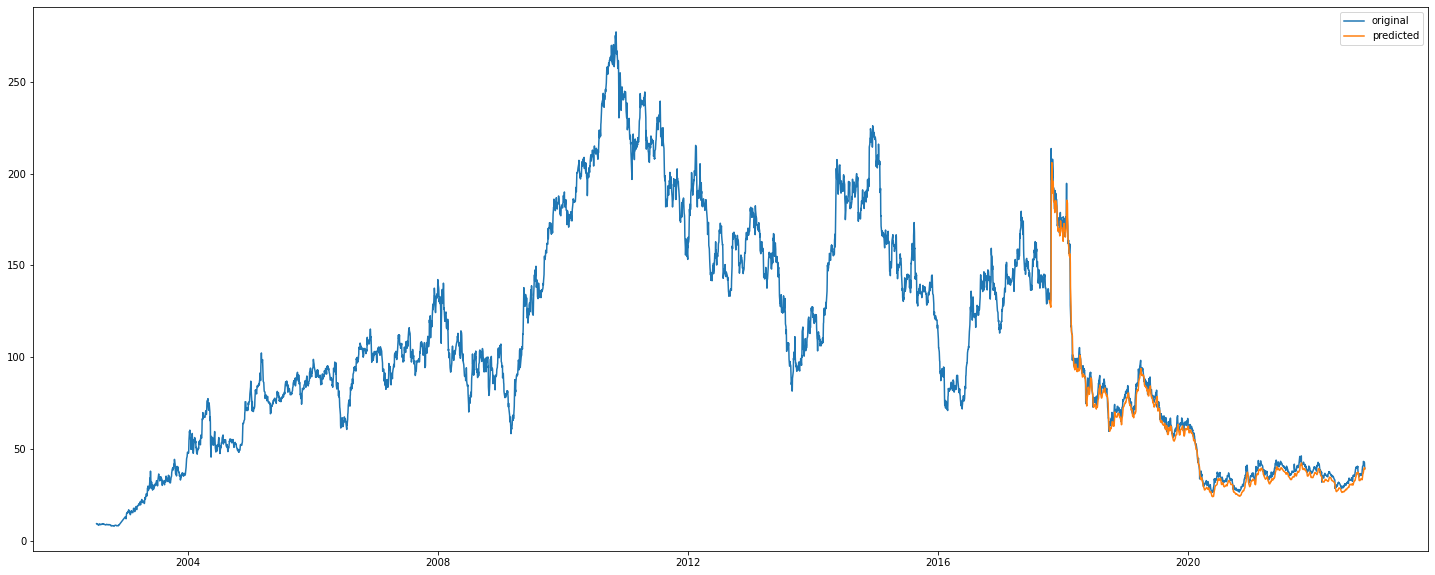

In [109]:
#for plotting
plt.figure(figsize=(25,10))
train = dataset[:-test_size]
valid = dataset[-test_size:]
valid['Predictions'] = closing_price
plt.plot(dataset['close'], label='original')
plt.plot(valid['Predictions'],label='predicted')
plt.legend()

#FB PROPHET

In [110]:
!pip install pystan~=2.14 --quiet
!pip install fbprophet --quiet

     |████████████████████████████████| 67.3 MB 103 kB/s 
     |████████████████████████████████| 64 kB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [111]:
import fbprophet
from fbprophet import Prophet

In [112]:
data2 = data
data2['ds'] = pd.to_datetime(data['date'])
data2['y'] = (data2['close'])
data2 = data2[['ds','y']].reset_index(drop = True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5000 non-null   datetime64[ns]
 1   y       5000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.2 KB


In [113]:
data2

,ds,y
0,2002-07-18,9.380000
1,2002-07-19,9.300000
2,2002-07-22,8.960000
3,2002-07-23,9.120000
4,2002-07-24,9.140000
...,...,...
4995,2022-10-27,43.000000
4996,2022-10-28,43.099998
4997,2022-10-31,42.650002
4998,2022-11-01,40.099998


In [114]:
model = Prophet()
model.fit(data2)
model

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [115]:
future = model.make_future_dataframe(periods = 730)
future

,ds
0,2002-07-18
1,2002-07-19
2,2002-07-22
3,2002-07-23
4,2002-07-24
...,...
5725,2024-10-28
5726,2024-10-29
5727,2024-10-30
5728,2024-10-31


In [129]:
pred = model.predict(future)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-07-18,4.039939,-14.802460,25.035670,4.039939,4.039939,0.357551,0.357551,0.357551,1.028057,1.028057,1.028057,-0.670506,-0.670506,-0.670506,0.0,0.0,0.0,4.397490
1,2002-07-19,4.112741,-15.003326,22.698201,4.112741,4.112741,0.478700,0.478700,0.478700,1.061055,1.061055,1.061055,-0.582354,-0.582354,-0.582354,0.0,0.0,0.0,4.591441
2,2002-07-22,4.331146,-14.025058,23.373164,4.331146,4.331146,0.719403,0.719403,0.719403,1.103885,1.103885,1.103885,-0.384481,-0.384481,-0.384481,0.0,0.0,0.0,5.050549
3,2002-07-23,4.403948,-13.521065,23.923471,4.403948,4.403948,0.744620,0.744620,0.744620,1.082381,1.082381,1.082381,-0.337760,-0.337760,-0.337760,0.0,0.0,0.0,5.148568
4,2002-07-24,4.476750,-15.044711,22.212357,4.476750,4.476750,0.714535,0.714535,0.714535,1.013842,1.013842,1.013842,-0.299307,-0.299307,-0.299307,0.0,0.0,0.0,5.191285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,2024-10-28,-2.138438,-85.542478,90.408160,-89.893827,85.225803,4.277536,4.277536,4.277536,1.103885,1.103885,1.103885,3.173651,3.173651,3.173651,0.0,0.0,0.0,2.139097
5726,2024-10-29,-2.172000,-89.586741,90.037300,-90.085109,85.399895,4.442872,4.442872,4.442872,1.082381,1.082381,1.082381,3.360492,3.360492,3.360492,0.0,0.0,0.0,2.270873
5727,2024-10-30,-2.205561,-91.516947,91.366707,-90.276390,85.573988,4.540369,4.540369,4.540369,1.013842,1.013842,1.013842,3.526527,3.526527,3.526527,0.0,0.0,0.0,2.334808
5728,2024-10-31,-2.239123,-91.230922,95.540535,-90.467671,85.748081,4.698712,4.698712,4.698712,1.028057,1.028057,1.028057,3.670655,3.670655,3.670655,0.0,0.0,0.0,2.459589


In [132]:
pred[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2002-07-18,4.397490,0.0,25.035670
1,2002-07-19,4.591441,0.0,22.698201
2,2002-07-22,5.050549,0.0,23.373164
3,2002-07-23,5.148568,0.0,23.923471
4,2002-07-24,5.191285,0.0,22.212357


In [135]:
pred.yhat[pred.yhat < 0] = 0
pred.yhat_lower[pred.yhat_lower < 0] = 0
pred.yhat_upper[pred.yhat_upper < 0] = 0
pred.trend_upper[pred.trend_upper < 0] = 0
pred.trend_lower[pred.trend_lower < 0] = 0
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-07-18,4.039939,0.0,25.035670,4.039939,4.039939,0.357551,0.357551,0.357551,1.028057,1.028057,1.028057,-0.670506,-0.670506,-0.670506,0.0,0.0,0.0,4.397490
1,2002-07-19,4.112741,0.0,22.698201,4.112741,4.112741,0.478700,0.478700,0.478700,1.061055,1.061055,1.061055,-0.582354,-0.582354,-0.582354,0.0,0.0,0.0,4.591441
2,2002-07-22,4.331146,0.0,23.373164,4.331146,4.331146,0.719403,0.719403,0.719403,1.103885,1.103885,1.103885,-0.384481,-0.384481,-0.384481,0.0,0.0,0.0,5.050549
3,2002-07-23,4.403948,0.0,23.923471,4.403948,4.403948,0.744620,0.744620,0.744620,1.082381,1.082381,1.082381,-0.337760,-0.337760,-0.337760,0.0,0.0,0.0,5.148568
4,2002-07-24,4.476750,0.0,22.212357,4.476750,4.476750,0.714535,0.714535,0.714535,1.013842,1.013842,1.013842,-0.299307,-0.299307,-0.299307,0.0,0.0,0.0,5.191285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,2024-10-28,-2.138438,0.0,90.408160,0.000000,85.225803,4.277536,4.277536,4.277536,1.103885,1.103885,1.103885,3.173651,3.173651,3.173651,0.0,0.0,0.0,2.139097
5726,2024-10-29,-2.172000,0.0,90.037300,0.000000,85.399895,4.442872,4.442872,4.442872,1.082381,1.082381,1.082381,3.360492,3.360492,3.360492,0.0,0.0,0.0,2.270873
5727,2024-10-30,-2.205561,0.0,91.366707,0.000000,85.573988,4.540369,4.540369,4.540369,1.013842,1.013842,1.013842,3.526527,3.526527,3.526527,0.0,0.0,0.0,2.334808
5728,2024-10-31,-2.239123,0.0,95.540535,0.000000,85.748081,4.698712,4.698712,4.698712,1.028057,1.028057,1.028057,3.670655,3.670655,3.670655,0.0,0.0,0.0,2.459589


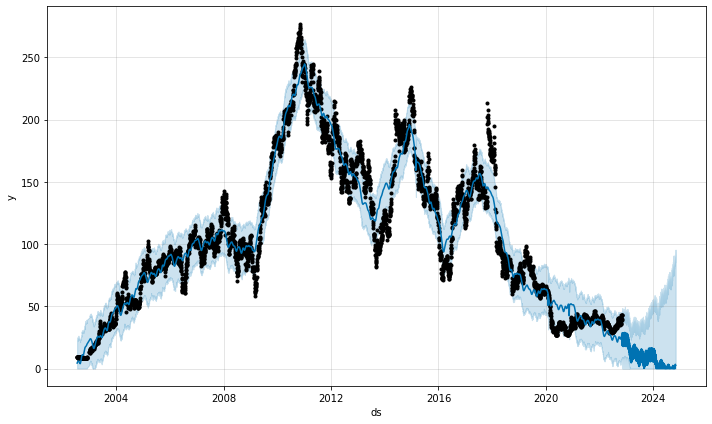

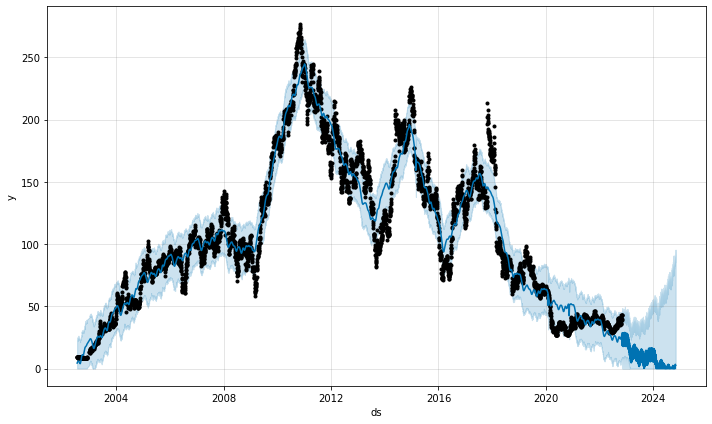

In [136]:
model.plot(pred)

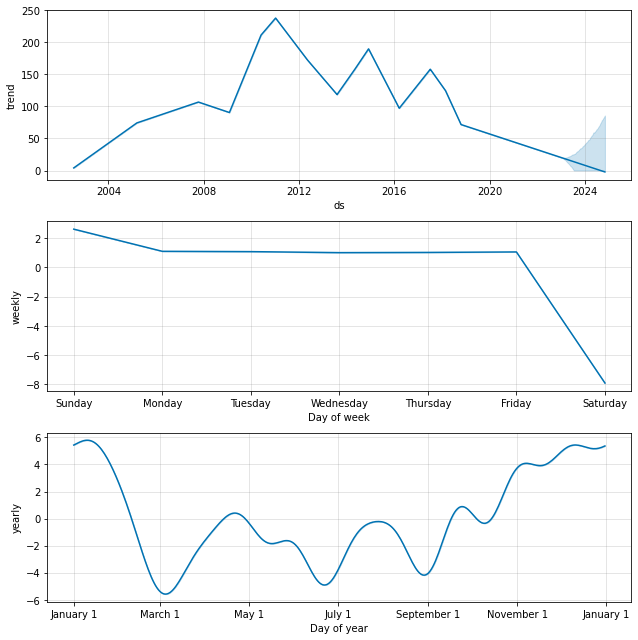

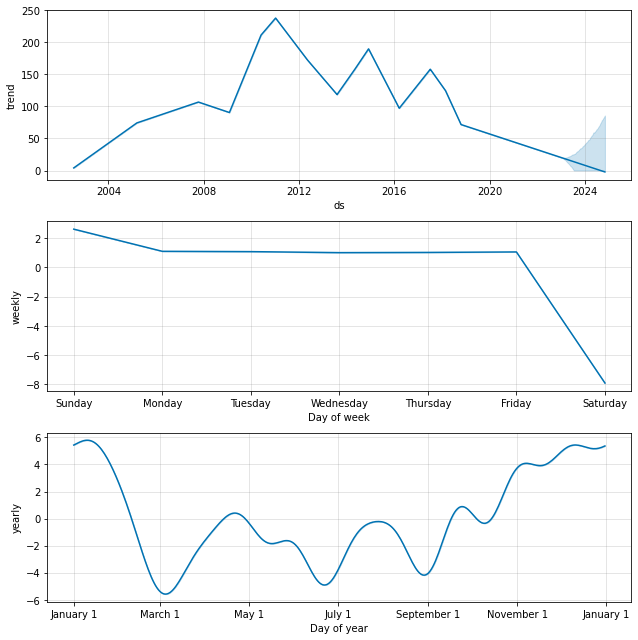

In [137]:
model.plot_components(pred)

In [120]:
se = np.square(pred.loc[:, 'yhat'] - data2.y)
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse

14.846098193966876

# Deployment

In [121]:
pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==0.9.5
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.4.